[[-1.78798489e-01 -1.75302381e-01 -1.75221065e-01 -1.79006230e-01]
 [-1.42906736e-01 -1.43716906e-01 -1.42491497e-01 -1.43119124e-01]
 [-1.04260537e-01 -1.04695307e-01 -1.06368796e-01 -1.06126241e-01]
 [-7.18416967e-02 -7.17103596e-02 -7.40821103e-02 -7.36079997e-02]
 [-4.92724325e-02 -4.83699070e-02 -4.83982024e-02 -4.90506233e-02]
 [-3.27786191e-02 -3.26632986e-02 -3.24210242e-02 -3.31364104e-02]
 [-1.97203034e-02 -2.08600151e-02 -2.21720160e-02 -2.16762927e-02]
 [-1.33640414e-02 -1.35426773e-02 -1.34529736e-02 -1.35919376e-02]
 [-9.67751568e-03 -8.57715988e-03 -9.67428466e-03 -9.09504180e-03]
 [-5.59236415e-03 -6.68706222e-03 -5.88990367e-03 -5.89838442e-03]
 [-5.59344884e-03 -5.19133633e-03 -5.09183306e-03 -4.99514217e-03]
 [-3.39746904e-03 -4.89278480e-03 -3.29705626e-03 -4.79530531e-03]
 [-2.06394374e-01 -2.06674061e-01 -2.08671445e-01 -2.06403167e-01]
 [-1.46795506e-01 -1.47138541e-01 -1.47868006e-01 -1.49687572e-01]
 [-9.85272530e-02 -9.57721449e-02 -9.63277357e-02 -1.01110363e

[[-5.75219443e-01 -5.75357124e-01 -5.75172201e-01 -5.75162616e-01]
 [-5.06301108e-01 -5.06162331e-01 -5.06238104e-01 -5.06200307e-01]
 [-4.14155014e-01 -4.14179394e-01 -4.14106777e-01 -4.14244016e-01]
 [-3.24597200e-01 -3.24665355e-01 -3.24627703e-01 -3.24600689e-01]
 [-2.47712222e-01 -2.47799662e-01 -2.47745970e-01 -2.47726696e-01]
 [-1.86009185e-01 -1.86084385e-01 -1.86073508e-01 -1.86130878e-01]
 [-1.38324657e-01 -1.38299983e-01 -1.38319901e-01 -1.38377855e-01]
 [-1.02441504e-01 -1.02383179e-01 -1.02509251e-01 -1.02368381e-01]
 [-7.57255229e-02 -7.56367098e-02 -7.56973124e-02 -7.57304592e-02]
 [-5.60604211e-02 -5.61204016e-02 -5.60292702e-02 -5.61245918e-02]
 [-4.25332676e-02 -4.26357974e-02 -4.25444663e-02 -4.26090404e-02]
 [-3.52492519e-02 -3.51471726e-02 -3.51738679e-02 -3.52229580e-02]
 [-6.39564585e-01 -6.39521310e-01 -6.39538771e-01 -6.39568909e-01]
 [-5.22087765e-01 -5.22111834e-01 -5.22202261e-01 -5.22142774e-01]
 [-4.02933745e-01 -4.03126766e-01 -4.02945677e-01 -4.02969567e

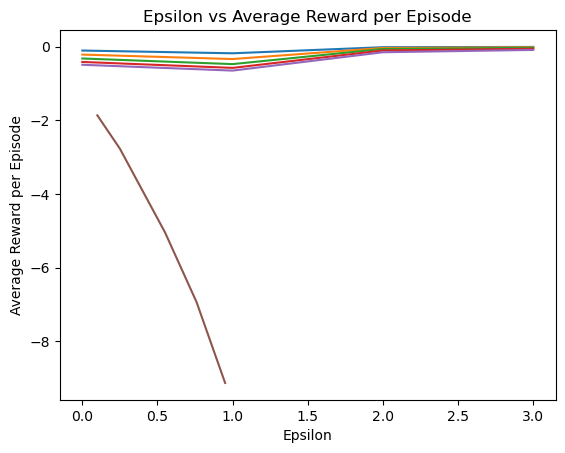

In [ ]:
!pip install pygame
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create environment
env = gym.make('CliffWalking-v0' , render_mode = "rgb_array")

# Initialize Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
alpha = 0.0001
gamma = 0.6
eps_array = [0.95, 0.76, 0.55, 0.25, 0.1]
num_episodes = 100000
start_states = [(3,0), (0,4), (1,7), (2,9)]

# Reset environment
env.reset()
#env.render()

# Set initial state
state = 36

# Track average reward per episode for each epsilon value
avg_rewards = []
rewards = []

# Train the agent
for g in range(len(eps_array)):
    epsilon = eps_array[g]
    total_reward = 0

    # Initialize array to track rewards per episode
    rewards = np.zeros(num_episodes)

    # Loop over episodes
    for e in range(100000):
        action = 0

        # Choose an action either randomly or by exploiting the learned values
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        # Take the action and get the new state, reward, and whether the episode is done
        next_state, reward, truncated, terminated, i= env.step(action)
        done = truncated or terminated
        total_reward += reward

        # Update the Q-table if the episode is not done
        if not done:
            new_value = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]))
            q_table[state, action] = new_value

        # Update the current state
        state = next_state

        # Track rewards per episode
        rewards[e] = reward

    # Track average reward per episode for this epsilon value
    avg_reward = np.mean(rewards)
    avg_rewards.append(avg_reward)
    s_values = [0] * 4
    print(q_table)
    s_values[0] = q_table[2,0]
    s_values[1] = q_table[0,3]
    s_values[2] = q_table[7,1]
    s_values[3] = q_table[9,2]

    plt.plot( s_values)
    plt.title('Epsilon vs  Q value per state')
    plt.xlabel('Epsilon')
    plt.ylabel('Q value per state')
# Derive the policy from the Q-table
policy = np.zeros([env.observation_space.n, 1])
for i in range(env.observation_space.n):
    policy[i] = np.argmax(q_table[i])

# Print the learned policy
print("Learned Policy:")
for i in range(env.observation_space.n):
    if i % 12 == 0:
        print("\n")
    print(policy[i], end="\t")

# Plot epsilon values vs average reward per episode
plt.plot(eps_array, avg_rewards)
plt.title('Epsilon vs Average Reward per Episode')
plt.xlabel('Epsilon')
plt.ylabel('Average Reward per Episode')
plt.show()

